In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVC,SVC
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')
min_max_scale_data=pd.read_csv('min_max_resampled_with_encoding.csv')

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
svm_clf = LinearSVC(random_state=48) 
start_time = timeit.default_timer()
svm_clf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  465.2168809


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
y_pred=svm_clf.predict(X_test)

In [6]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.8213
F1 score : 0.7868
Recall score : 0.6579
Precision score : 0.9785


<AxesSubplot:>

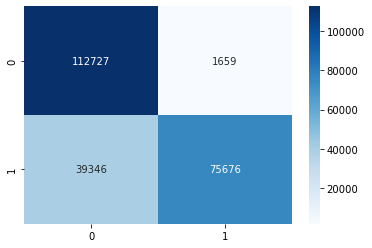

In [7]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='Blues')

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85    114386
           1       0.98      0.66      0.79    115022

    accuracy                           0.82    229408
   macro avg       0.86      0.82      0.82    229408
weighted avg       0.86      0.82      0.82    229408



### Data with Resampling and with OneHotEncoding

In [9]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test2,y_train,y_test2=train_test_split(X,Y,test_size=0.2,random_state=10)

In [10]:
svm_clf = LinearSVC(random_state=48) 
start_time = timeit.default_timer()
svm_clf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2=svm_clf.predict(X_test2)

Time taken to fit the model in sec is  188.78854190000004


In [12]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9018
F1 score : 0.8984
Recall score : 0.8664
Precision score : 0.9330


<AxesSubplot:>

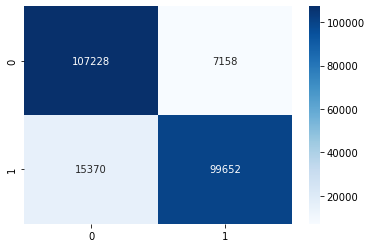

In [13]:
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True,fmt='', cmap='Blues')

In [14]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90    114386
           1       0.93      0.87      0.90    115022

    accuracy                           0.90    229408
   macro avg       0.90      0.90      0.90    229408
weighted avg       0.90      0.90      0.90    229408



### OneHotEncoding improved accuracy

In [15]:
svm_clf = LinearSVC(random_state=48,dual=False) 
start_time = timeit.default_timer()
svm_clf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2=svm_clf.predict(X_test2)

Time taken to fit the model in sec is  64.24129019999998


In [17]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9018
F1 score : 0.8984
Recall score : 0.8664
Precision score : 0.9330


In [18]:
svm_clf = LinearSVC(random_state=48,dual=False,max_iter=3000) 
start_time = timeit.default_timer()
svm_clf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2=svm_clf.predict(X_test2)

Time taken to fit the model in sec is  64.47007959999996


In [20]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9018
F1 score : 0.8984
Recall score : 0.8664
Precision score : 0.9330


* Changing dual and maxiter has no impact on accuracy score
* Dual=False can resolve the convergence warning

### Performing Cross Validation

In [21]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test2,y_train,y_test2=train_test_split(X,Y,test_size=0.2,random_state=10)

In [23]:
svm_clf = LinearSVC(random_state=48,dual=False) 
start_time = timeit.default_timer()
svm_clf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(svm_clf, X, Y, cv=10,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  65.19228939999994
Time taken to perform cv for the model in sec is  596.9197777000002
Cv2 scores: [0.05488911 0.6682243  0.67090947 0.66442321 0.66982843 0.67007253
 0.67017428 0.67027889 0.67383591 0.66982555]
Mean 5-Fold R Squared: 0.6082461676167825


In [29]:
svm_clf = LinearSVC(random_state=48,dual=False) 
start_time = timeit.default_timer()
svm_clf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(svm_clf, X, Y, cv=5,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  66.21286610000243
Time taken to perform cv for the model in sec is  257.3644861000066
Cv2 scores: [0.36410239 0.66691513 0.66921672 0.66935621 0.67082086]
Mean 5-Fold R Squared: 0.6080822606911251


* We see that the metrics for all folds in cross_val_score are uniform so it can be concluded that the model is able to generalise